# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Training For Image

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


# Validation For Image

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Building Model

In [5]:
cnn=tf.keras.models.Sequential()

# Buliding Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
# Do it again to reduce the size of matrix to just focus on important elements in image
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu')) # Hidden layers

In [10]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu')) # Hidden layers

In [11]:
cnn.add(tf.keras.layers.Dropout(0.5)) # To avoid overfitting

In [12]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) # Output Layer

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

# Compiling and Training

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 41s 346ms/step - loss: 5.2727 - accuracy: 0.0289 - val_loss: 3.5741 - val_accuracy: 0.0484
Epoch 2/32
98/98 [==============================] - 30s 277ms/step - loss: 3.5391 - accuracy: 0.0488 - val_loss: 3.4999 - val_accuracy: 0.1111
Epoch 3/32
98/98 [==============================] - 30s 278ms/step - loss: 3.4428 - accuracy: 0.0790 - val_loss: 3.1696 - val_accuracy: 0.2507
Epoch 4/32
98/98 [==============================] - 30s 279ms/step - loss: 3.2697 - accuracy: 0.1271 - val_loss: 2.9687 - val_accuracy: 0.3105
Epoch 5/32
98/98 [==============================] - 30s 282ms/step - loss: 3.0759 - accuracy: 0.1872 - val_loss: 2.5499 - val_accuracy: 0.4074
Epoch 6/32
98/98 [==============================] - 31s 286ms/step - loss: 2.7808 - accuracy: 0.2549 - val_loss: 2.1451 - val_accuracy: 0.5043
Epoch 7/32
98/98 [==============================] - 30s 279ms/step - loss: 2.5193 - accuracy: 0.3217 - val_loss: 2.0028 - val_accuracy: 0.4957

# Saving Model

In [18]:
cnn.save('training_model.h5')

In [19]:
training_history.history # Return Dictionary of history

{'loss': [5.272712707519531,
  3.539074659347534,
  3.442797899246216,
  3.2697322368621826,
  3.075932025909424,
  2.78084397315979,
  2.519263982772827,
  2.2330896854400635,
  1.9789401292800903,
  1.8308650255203247,
  1.6287943124771118,
  1.4428751468658447,
  1.3316280841827393,
  1.1633379459381104,
  1.0337525606155396,
  0.9880022406578064,
  0.9319136142730713,
  0.8435757756233215,
  0.7833049297332764,
  0.8521578311920166,
  0.6627257466316223,
  0.5849705934524536,
  0.6100131869316101,
  0.5146089792251587,
  0.49027496576309204,
  0.4461541473865509,
  0.42611265182495117,
  0.4068264067173004,
  0.361919641494751,
  0.4147534668445587,
  0.35690581798553467,
  0.31813955307006836],
 'accuracy': [0.028892455622553825,
  0.048796147108078,
  0.0789727121591568,
  0.1271268129348755,
  0.18715891242027283,
  0.2548956573009491,
  0.321669340133667,
  0.39390048384666443,
  0.4635634124279022,
  0.5027287602424622,
  0.5592295527458191,
  0.608346700668335,
  0.6423755884

In [20]:
# Recording the history of training in json file
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [21]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Model's accuracy of Validation set

In [22]:
print(f"Validation Accuracy: {training_history.history['val_accuracy'][-1] * 100} %")

Validation Accuracy: 92.87749528884888 %


# Accuracy Visualization

# Training Visualization

In [23]:
epochs = [i for i in range(1, 33)] 

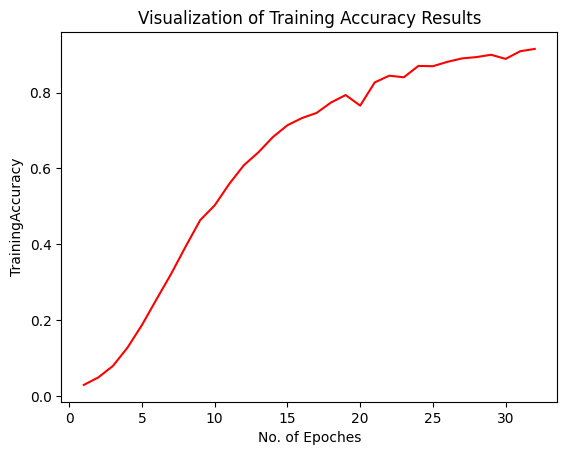

In [24]:
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel("No. of Epoches")
plt.ylabel("TrainingAccuracy")
plt.title("Visualization of Training Accuracy Results")
plt.show()

# Validation Accuracy

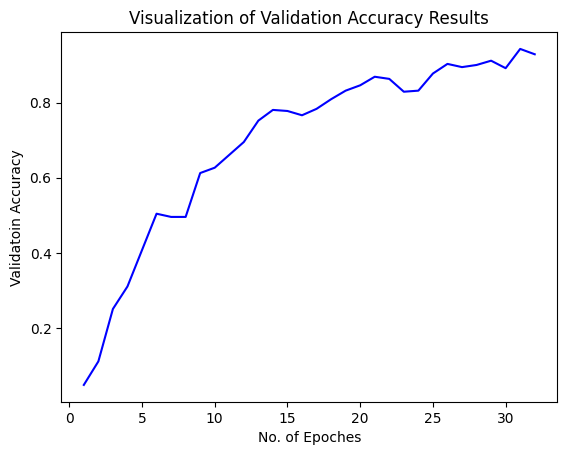

In [25]:
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.xlabel('No. of Epoches')
plt.ylabel('Validatoin Accuracy')
plt.title('Visualization of Validation Accuracy Results')
plt.show()